# 6.4 Machine Learning 

In [1]:
# Importing the libraries that are going to be used and importing the DF
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
path = 'D:\Downloads\Data Analytics\TASK 6'

In [3]:
df = pd.read_csv(os.path.join(path,'df_clean4.csv'), index_col = False)

In [4]:
df

,id,model year,manufacturer,model,cylinders,fuel,price,mileage,car conditions,transmission,car type,car colour,state,Date posted,mileage category,price category
0,7308841185,1989,unknown,kenworth t-600,unknown,diesel,500,1111,parts only,manual,truck,white,North Carolina,18/04/2021,very low mileage,very cheap
1,7306992109,1994,chevrolet,unknown,8 cylinders,gas,500,1000,clean,manual,truck,red,Wisconsin,14/04/2021,very low mileage,very cheap
2,7302434257,1982,honda,cb750sc,4 cylinders,gas,500,1,clean,manual,other,unknown,Colorado,05/04/2021,new,very cheap
3,7313155712,1987,ford,thunderbird turbo coupe,6 cylinders,gas,500,0,parts only,automatic,coupe,black,California,26/04/2021,new,very cheap
4,7315266718,2016,gmc,yukon,8 cylinders,gas,501,70153,clean,automatic,SUV,unknown,California,01/05/2021,decent mileage,very cheap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294951,7314331466,2020,ferrari,f8 tributo,8 cylinders,gas,347999,3000,clean,automatic,coupe,unknown,California,29/04/2021,very low mileage,very expensive
294952,7306488355,2020,ferrari,f8 tributo,8 cylinders,gas,349999,2800,clean,automatic,coupe,unknown,California,13/04/2021,very low mileage,very expensive
294953,7303420900,2003,unknown,any and all,5 cylinders,diesel,400123,123321,clean,automatic,pickup,blue,Pennsylvania,07/04/2021,high mileage,very expensive
294954,7313051670,2016,unknown,Lambo Aventador SV Roadster,12 cylinders,gas,516999,9982,clean,automatic,convertible,white,Florida,26/04/2021,very low mileage,very expensive


In [5]:
# Exploring the DF for variable relationships

<Figure size 1440x720 with 0 Axes>

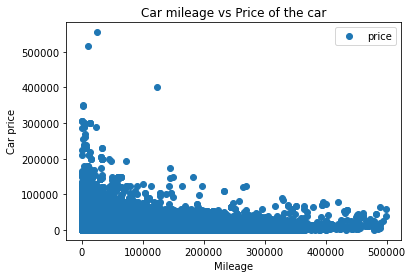

In [20]:
plt.figure(figsize=(20,10))
df.plot(x = 'mileage', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Car mileage vs Price')  
plt.xlabel('Mileage')  
plt.ylabel('Car price')  
plt.show()

In [7]:
# As we can see, there is an indication of a relation between those two variables
# There is also an outlier that was preivously seen and was not removed, as some cars can have a very high price

## Original Hypothesis:
#### Some states across the USA have different car preferences (SUV, Pickup, Hactback,…), then not all car types are available equally in proportion on all regions
_____
## Hypothesis for the exercise:
#### Cars with a lower mileage, have a higher price.

_______

### 6.6 Reshaping variables

In [8]:
X = df['mileage'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [9]:
X

array([[  1111],
       [  1000],
       [     1],
       ...,
       [123321],
       [  9982],
       [ 25365]], dtype=int64)

In [10]:
y

array([[   500],
       [   500],
       [   500],
       ...,
       [400123],
       [516999],
       [554900]], dtype=int64)

### 6.7 Dividing into training and test set

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 6.8 Linear regression on the dataset

In [12]:
# Creating the Linear regression object to be used
regression = LinearRegression()

In [13]:
# Fitting the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [14]:
# Create predictions of y based on X.
y_predicted = regression.predict(X_test)

### 6.9 Plot based on the test

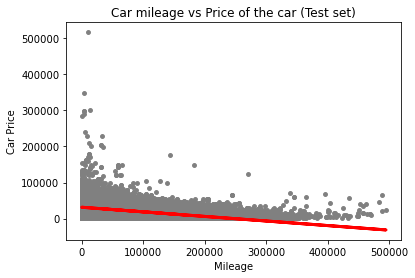

In [15]:
# Now lets create the first visualization to plot the prediction on top of the scatterplot
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Car mileage vs Price of the car (Test set)')
plot_test.xlabel('Mileage')
plot_test.ylabel('Car Price')
plot_test.show()

### 6.10 Interpreation of the test

#### Inded there seems to be a relation, but as we can see it is not accurate, as the car prices started to become negative after a certain point, meaning that people would pay to get rid of their cars after a certain mileage. I know that some old cars can give headaches, but I don't think many people would pay to get rid of their cars.
_______

### 6.11 MSE and R2

In [16]:
# For additional data, lets use the MSE and R2 statistics to evaluate the model performance
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [17]:
# And print out the results
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.12712119]]
Mean squared error:  164154992.6997643
R2 score:  0.2798521326546086


The **Slope** was negative, meaning that as the mileage rise (X), the prices (y) decreases, which is in accordance to the hypothesis.

The **MSE** was incredible high, at 191,055,459 meaning that regression is not very good to create an accurate representation of the data.

The **R2** was considerably low, at about 20%, which could be caused either by the outlier, and because there are other factors in place when it comes to car prices that are really relevant, for example a classical car, can have a high mileage, and depending on the conservation and year, sell for an insanely high price.

### 6.12 Comparing the data 

In [18]:
# Now, lets compare the prediction with the actual data.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,43190,26765.579170
1,8990,14978.012866
2,23590,29012.191908
3,10995,15344.757490
4,10995,18012.014235
5,2000,26058.785371
6,13577,16199.138988
7,13329,19572.553927
8,24999,11195.649069
9,44999,21036.481516


### 6.13 Final thoughts

Unfortunately the linear regression model was not very useful in this case as there too many variables that would result in the car prices being different, such as the Maker, the car model, the location, the condition of the car, the color, and even things like the aesthetic of the car itself.
To create a more acurate representation of the scenario, we could limit the dataset, remove the outliers and try to get a better result, however since the prices were going down, there would always be a tendency of the prices going to zero, which would not happen in the real world, as even a scraped car is worth something.